In [8]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from fastai import *
from fastai.vision import *

In [10]:
path = Config.data_path()/'planet'
print(path)

/home/jupyter/.fastai/data/planet


In [12]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [13]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [15]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))

data = (src.transform(tfms, size=256)
        .databunch(bs=32).normalize(imagenet_stats))

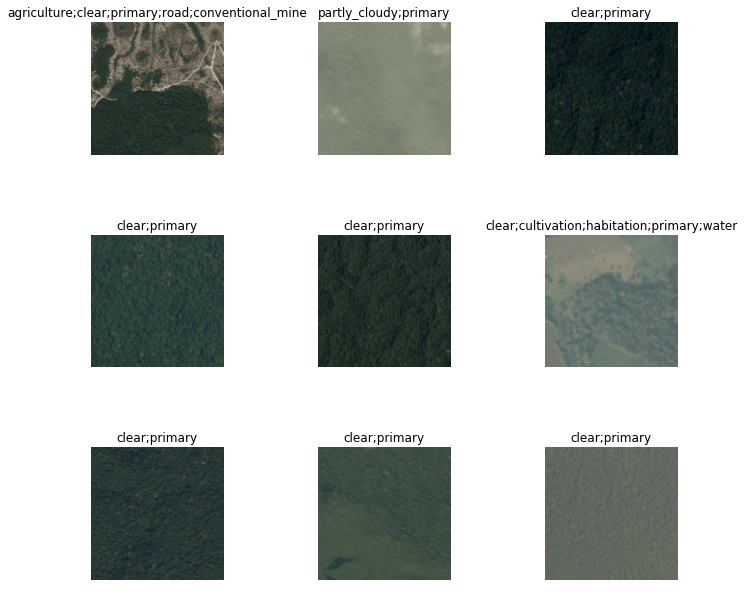

In [16]:
data.show_batch(rows=3, figsize=(10,9))

In [17]:
arch = models.resnet50

In [18]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


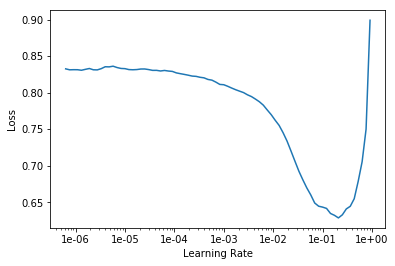

In [20]:
learn.recorder.plot()

In [21]:
lr = 0.01

In [22]:
learn.fit_one_cycle(5, slice(lr))

Total time: 33:13
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.118352    0.104449    0.947055         0.908630  (06:40)
2      0.114948    0.103683    0.943262         0.908752  (06:38)
3      0.103965    0.093494    0.956814         0.915190  (06:38)
4      0.097992    0.086988    0.955746         0.926165  (06:37)
5      0.086317    0.084709    0.958326         0.927289  (06:38)



In [23]:
learn.save('stage-1-rn50')

In [ ]:
learn.load('stage-1-rn50')

In [24]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


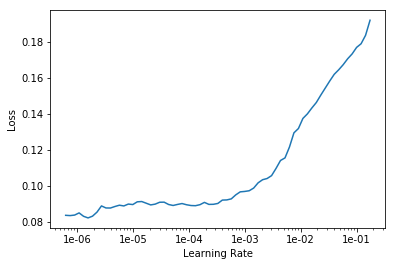

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(5, slice(1e-6, 1e-5))

Total time: 43:28
epoch  train_loss  valid_loss  accuracy_thresh  fbeta   
1      0.086405    0.084862    0.959561         0.926744  (08:40)
2      0.087956    0.088513    0.959103         0.926787  (08:42)
3      0.089384    0.086342    0.959140         0.927020  (08:42)
4      0.088158    0.084963    0.958566         0.928522  (08:42)
5      0.085125    0.085808    0.958616         0.927704  (08:42)



In [46]:
learn.save('stage-2-rn50')

In [79]:
learn.data = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
        .random_split_by_pct(0.2)
        .label_from_df(sep=' ')
        .add_test_folder('test-jpg')
        .transform(tfms, size=256)
        .databunch()
        .normalize(imagenet_stats)
)

In [27]:
learn.data = (src.add_test_folder('test-jpg')
        .transform(tfms, size=256)
        .databunch(bs=8).normalize(imagenet_stats))

In [80]:
len(learn.data.train_ds)

32384

In [81]:
len(learn.data.valid_ds)

8095

In [82]:
len(learn.data.test_ds)

61191

In [83]:
len(learn.data.train_dl)

506

In [84]:
len(learn.data.valid_dl)

85

In [85]:
len(learn.data.test_dl)

638

In [86]:
learn.data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f37f04b7668>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f37f66deea0>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))], collate_fn=<function data_collate at 0x7f37fda2df28>, skip_size1=True)

In [87]:
learn.data.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f37b1e7a470>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f37f66deea0>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))], collate_fn=<function data_collate at 0x7f37fda2df28>, skip_size1=False)

In [88]:
learn.data.test_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f37b1e7a4e0>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f37f66deea0>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))], collate_fn=<function data_collate at 0x7f37fda2df28>, skip_size1=False)

In [89]:
learn.data.train_ds

LabelList
y: MultiCategoryList (32384 items)
[list(['agriculture', 'clear', 'primary', 'water']) list(['clear', 'primary']) list(['clear', 'primary'])
 list(['agriculture', 'clear', 'habitation', 'primary', 'road']) ... list(['cloudy'])
 list(['agriculture', 'clear', 'primary']) list(['agriculture', 'clear', 'primary', 'road'])
 list(['agriculture', 'cultivation', 'partly_cloudy', 'primary'])]
Path: .
x: ImageItemList (32384 items)
['/home/jupyter/.fastai/data/planet/train-jpg/train_1.jpg' '/home/jupyter/.fastai/data/planet/train-jpg/train_2.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_3.jpg' '/home/jupyter/.fastai/data/planet/train-jpg/train_4.jpg'
 ... '/home/jupyter/.fastai/data/planet/train-jpg/train_40475.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_40476.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_40477.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_40478.jpg']
Path: /home/jupyter/.fastai/data/planet

In [90]:
learn.data.valid_ds

LabelList
y: MultiCategoryList (8095 items)
[list(['clear', 'primary']) list(['agriculture', 'clear', 'primary', 'water']) list(['clear', 'primary'])
 list(['cloudy']) ... list(['agriculture', 'haze', 'primary']) list(['cloudy']) list(['clear', 'primary'])
 list(['clear', 'primary'])]
Path: .
x: ImageItemList (8095 items)
['/home/jupyter/.fastai/data/planet/train-jpg/train_6394.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_23423.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_18737.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_31339.jpg' ...
 '/home/jupyter/.fastai/data/planet/train-jpg/train_34068.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_1968.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_39240.jpg'
 '/home/jupyter/.fastai/data/planet/train-jpg/train_39603.jpg']
Path: /home/jupyter/.fastai/data/planet

In [91]:
learn.data.test_ds

LabelList
y: MultiCategoryList (8095 items)
['agriculture;clear;primary;water' 'agriculture;clear;primary;water' 'agriculture;clear;primary;water'
 'agriculture;clear;primary;water' ... 'agriculture;clear;primary;water' 'agriculture;clear;primary;water'
 'agriculture;clear;primary;water' 'agriculture;clear;primary;water']
Path: .
x: ImageItemList (61191 items)
[PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/file_11457.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17412.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/file_11115.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17884.jpg') ...
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_3950.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_24684.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_6710.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_35623.jpg')]
Path: /home/jupyter/.fastai/data/planet

In [92]:
predictions = learn.TTA(ds_type=learn.data.test_ds)

Total time: 15:05



In [99]:
predictions[0]

tensor([[4.2079e-01, 9.9418e-01, 6.0121e-01,  ..., 4.3360e-04, 2.0248e-04,
         4.6566e-05],
        [2.4066e-02, 9.7372e-01, 8.5980e-01,  ..., 2.5212e-04, 7.9531e-05,
         2.0553e-05],
        [4.2327e-04, 9.9967e-01, 9.9840e-01,  ..., 2.0240e-02, 3.3978e-03,
         7.4765e-04],
        ...,
        [2.3097e-03, 2.3770e-02, 2.6461e-03,  ..., 2.0112e-05, 5.3131e-06,
         2.4203e-06],
        [1.1352e-03, 9.9937e-01, 9.9907e-01,  ..., 7.9088e-03, 1.0482e-02,
         6.4896e-04],
        [1.0417e-03, 9.9991e-01, 9.9763e-01,  ..., 4.7925e-03, 2.5513e-04,
         8.0650e-05]])

In [103]:
learn.get_preds(ds_type=learn.data.test_dl.x)

[tensor([[3.3124e-01, 9.9978e-01, 7.0742e-01,  ..., 8.6889e-05, 1.2902e-05,
          2.0070e-06],
         [1.1356e-02, 9.9097e-01, 9.7987e-01,  ..., 1.3947e-04, 4.2860e-05,
          4.2017e-06],
         [5.7922e-04, 9.9978e-01, 9.9909e-01,  ..., 1.0380e-02, 1.7598e-03,
          3.3723e-04],
         ...,
         [1.7215e-03, 2.3013e-02, 2.2587e-03,  ..., 1.8205e-05, 4.2773e-06,
          1.9790e-06],
         [2.1666e-03, 9.9874e-01, 9.9843e-01,  ..., 5.0367e-03, 1.2462e-02,
          7.7797e-04],
         [7.0746e-04, 9.9997e-01, 9.9959e-01,  ..., 2.4245e-03, 1.3483e-04,
          7.6321e-05]]), tensor([[0., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.]])]

In [51]:
predictions = learn.TTA()

KeyboardInterrupt: 

In [55]:
len(predictions[0])

17

In [62]:
learn.data.test_ds.x

ImageItemList (61191 items)
[PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/file_11457.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17412.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/file_11115.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_17884.jpg') ...
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_3950.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_24684.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_6710.jpg')
 PosixPath('/home/jupyter/.fastai/data/planet/test-jpg/test_35623.jpg')]
Path: /home/jupyter/.fastai/data/planet

In [76]:
predictions

torch.Size([8095, 17])

In [25]:
len(predictions)

61191

In [26]:
def find_tags(pred, thresh):
    classes = ""
    for idx, val in enumerate(pred):
        if val > thresh:
            classes = f'{classes} {learn.data.classes[idx]}'
    return classes.strip()

In [29]:
def predict(idx):
    pred_vals = predictions[idx]
    tags = find_tags(pred_vals, 0.2)
    print(tags)
    img = learn.data.test_ds[idx][0]
    return img

primary clear water


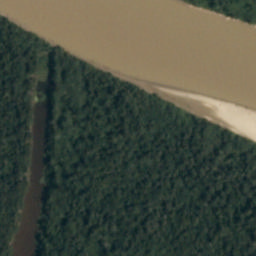

In [30]:
predict(0)

In [31]:
def get_row(idx):
    pred = predictions[idx]
    tags = find_tags(pred, 0.2)
    image_path = learn.data.test_ds.x[idx]
    image_name = re.search(r'([^/]+)$', f'{image_path}')[0].replace('.jpg', '')
    
    return image_name, tags


In [32]:
get_row(0)


('file_11457', 'primary clear water')

In [33]:
df = pd.DataFrame(columns=['image_name', 'tags'])
for idx in range(len(predictions)):
    if idx % 1000 == 0:
        print(f"Completed: {idx}")
        
    image_name, tags = get_row(idx)
    df.loc[idx] = [image_name, tags]

Completed: 0
Completed: 1000
Completed: 2000
Completed: 3000
Completed: 4000
Completed: 5000
Completed: 6000
Completed: 7000
Completed: 8000
Completed: 9000
Completed: 10000
Completed: 11000
Completed: 12000
Completed: 13000
Completed: 14000
Completed: 15000
Completed: 16000
Completed: 17000
Completed: 18000
Completed: 19000
Completed: 20000
Completed: 21000
Completed: 22000
Completed: 23000
Completed: 24000
Completed: 25000
Completed: 26000
Completed: 27000
Completed: 28000
Completed: 29000
Completed: 30000
Completed: 31000
Completed: 32000
Completed: 33000
Completed: 34000
Completed: 35000
Completed: 36000
Completed: 37000
Completed: 38000
Completed: 39000
Completed: 40000
Completed: 41000
Completed: 42000
Completed: 43000
Completed: 44000
Completed: 45000
Completed: 46000
Completed: 47000
Completed: 48000
Completed: 49000
Completed: 50000
Completed: 51000
Completed: 52000
Completed: 53000
Completed: 54000
Completed: 55000
Completed: 56000
Completed: 57000
Completed: 58000
Completed:

In [35]:
df.head()


,image_name,tags
0,file_11457,primary clear water
1,test_17412,primary clear
2,file_11115,cloudy partly_cloudy
3,test_17884,primary agriculture road partly_cloudy
4,test_34419,clear water cloudy


In [36]:
submission_path = 'submission_sz_256_val_0.2.csv'
df.to_csv(submission_path, index=False)


In [37]:
#kaggle competitions submit -c planet-understanding-the-amazon-from-space -f submission_sz_256_val_0.2.csv -m ""

In [38]:
torch.save(predictions,'predictions_191.pt')